

**Introduction**

Le cancer du sein demeure une préoccupation majeure de santé publique, exigeant des outils de diagnostic précis et rapides. Dans ce contexte, ce projet explore l'utilisation de techniques d'apprentissage automatique telles que la régression logistique, les arbres de décision et les forêts aléatoires pour analyser des données cliniques et d'imagerie. L'objectif est de développer des modèles prédictifs précis capables de prédire efficacement le diagnostic du cancer du sein.

### importation des bibliotheques

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier



### Chargement des données

In [ ]:
data = pd.read_csv('/content/breast-cancer.csv' , sep = ';' )

In [ ]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


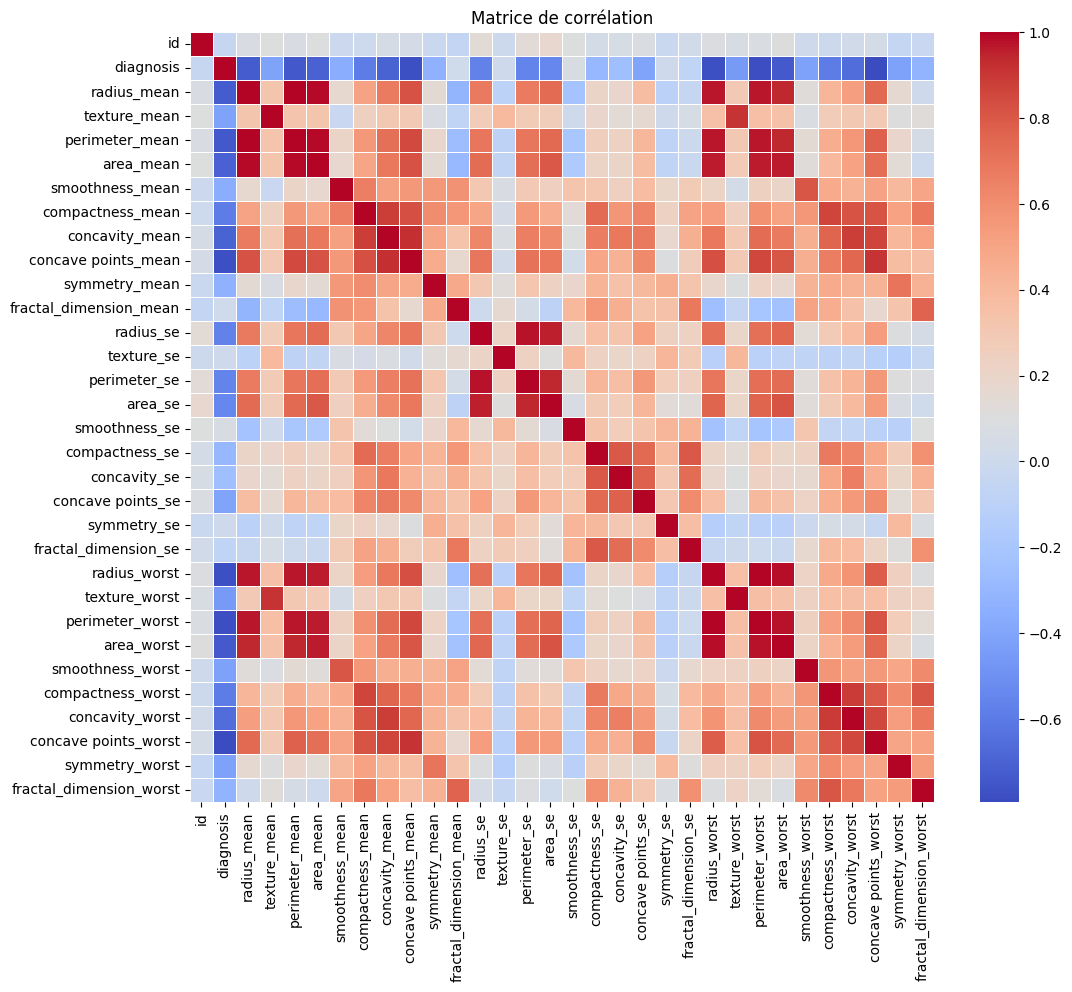

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Générer la matrice de corrélation
correlation_matrix = data.corr()

# Créer une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()



In [ ]:
# Liste des noms de colonnes pour les caractéristiques (features)
feature_names = data.columns[2:-1].tolist()  # Sélectionne les colonnes de 'radius_mean' à 'fractal_dimension_worst' et les convertit en liste

# Nom de la colonne pour la variable cible (target)
target_name = data.columns[1]  # Sélectionne la deuxième colonne, qui est 'diagnosis'

print("Les noms des colonnes pour les caractéristiques sont:", feature_names)
print("Le nom de la colonne pour la variable cible est:", target_name)


Les noms des colonnes pour les caractéristiques sont: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
Le nom de la colonne pour la variable cible est: diagnosis


In [ ]:
# Créer un dictionnaire de correspondance pour l'encodage
encoding_dict = {'M': 0, 'B': 1}

# Utiliser la méthode map pour encoder la variable diagnosis et assigner le résultat à une nouvelle colonne 'diagnosis_encoded'
data['diagnosis'] = data['diagnosis'].map(encoding_dict)

# Renommer la colonne 'diagnosis_encoded' en 'diagnosis'
data.rename(columns={'diagnosis': 'diagnosis_encoded'}, inplace=True)

# Renommez la colonne
data.rename(columns={'diagnosis_encoded': 'diagnosis'}, inplace=True)

on a encodé la variable  "diagnosis", qui  est une variable catégorielle avec deux valeurs possibles, 'M' et 'B'. L'encodage est effectué en remplaçant les valeurs 'M' par 0 et 'B' par 1.

Pourcentage de diagnosis = 0: 37.26%
Pourcentage de diagnosis = 1: 62.74%


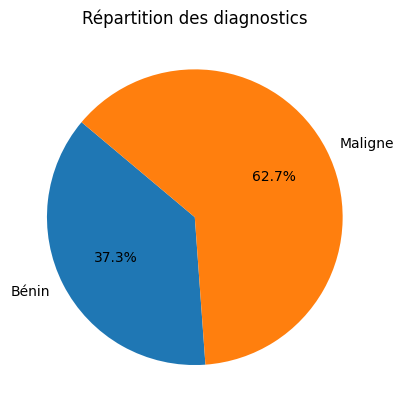

In [ ]:
import matplotlib.pyplot as plt

# Compter le nombre d'observations pour chaque valeur de diagnosis_encoded
counts = np.bincount(data['diagnosis'])

# Calculer le nombre total d'observations
total_observations = np.sum(counts)

# Calculer le pourcentage pour chaque valeur de diagnosis_encoded
percentages = counts / total_observations * 100

# Afficher les pourcentages
for i, percentage in enumerate(percentages):
    print("Pourcentage de diagnosis = {}: {:.2f}%".format(i, percentage))

# Créer un camembert
labels = ['Bénin', 'Maligne']  # Remplacez les libellés par ceux que vous utilisez
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)

# Ajouter un titre
plt.title('Répartition des diagnostics')

# Afficher le camembert
plt.show()


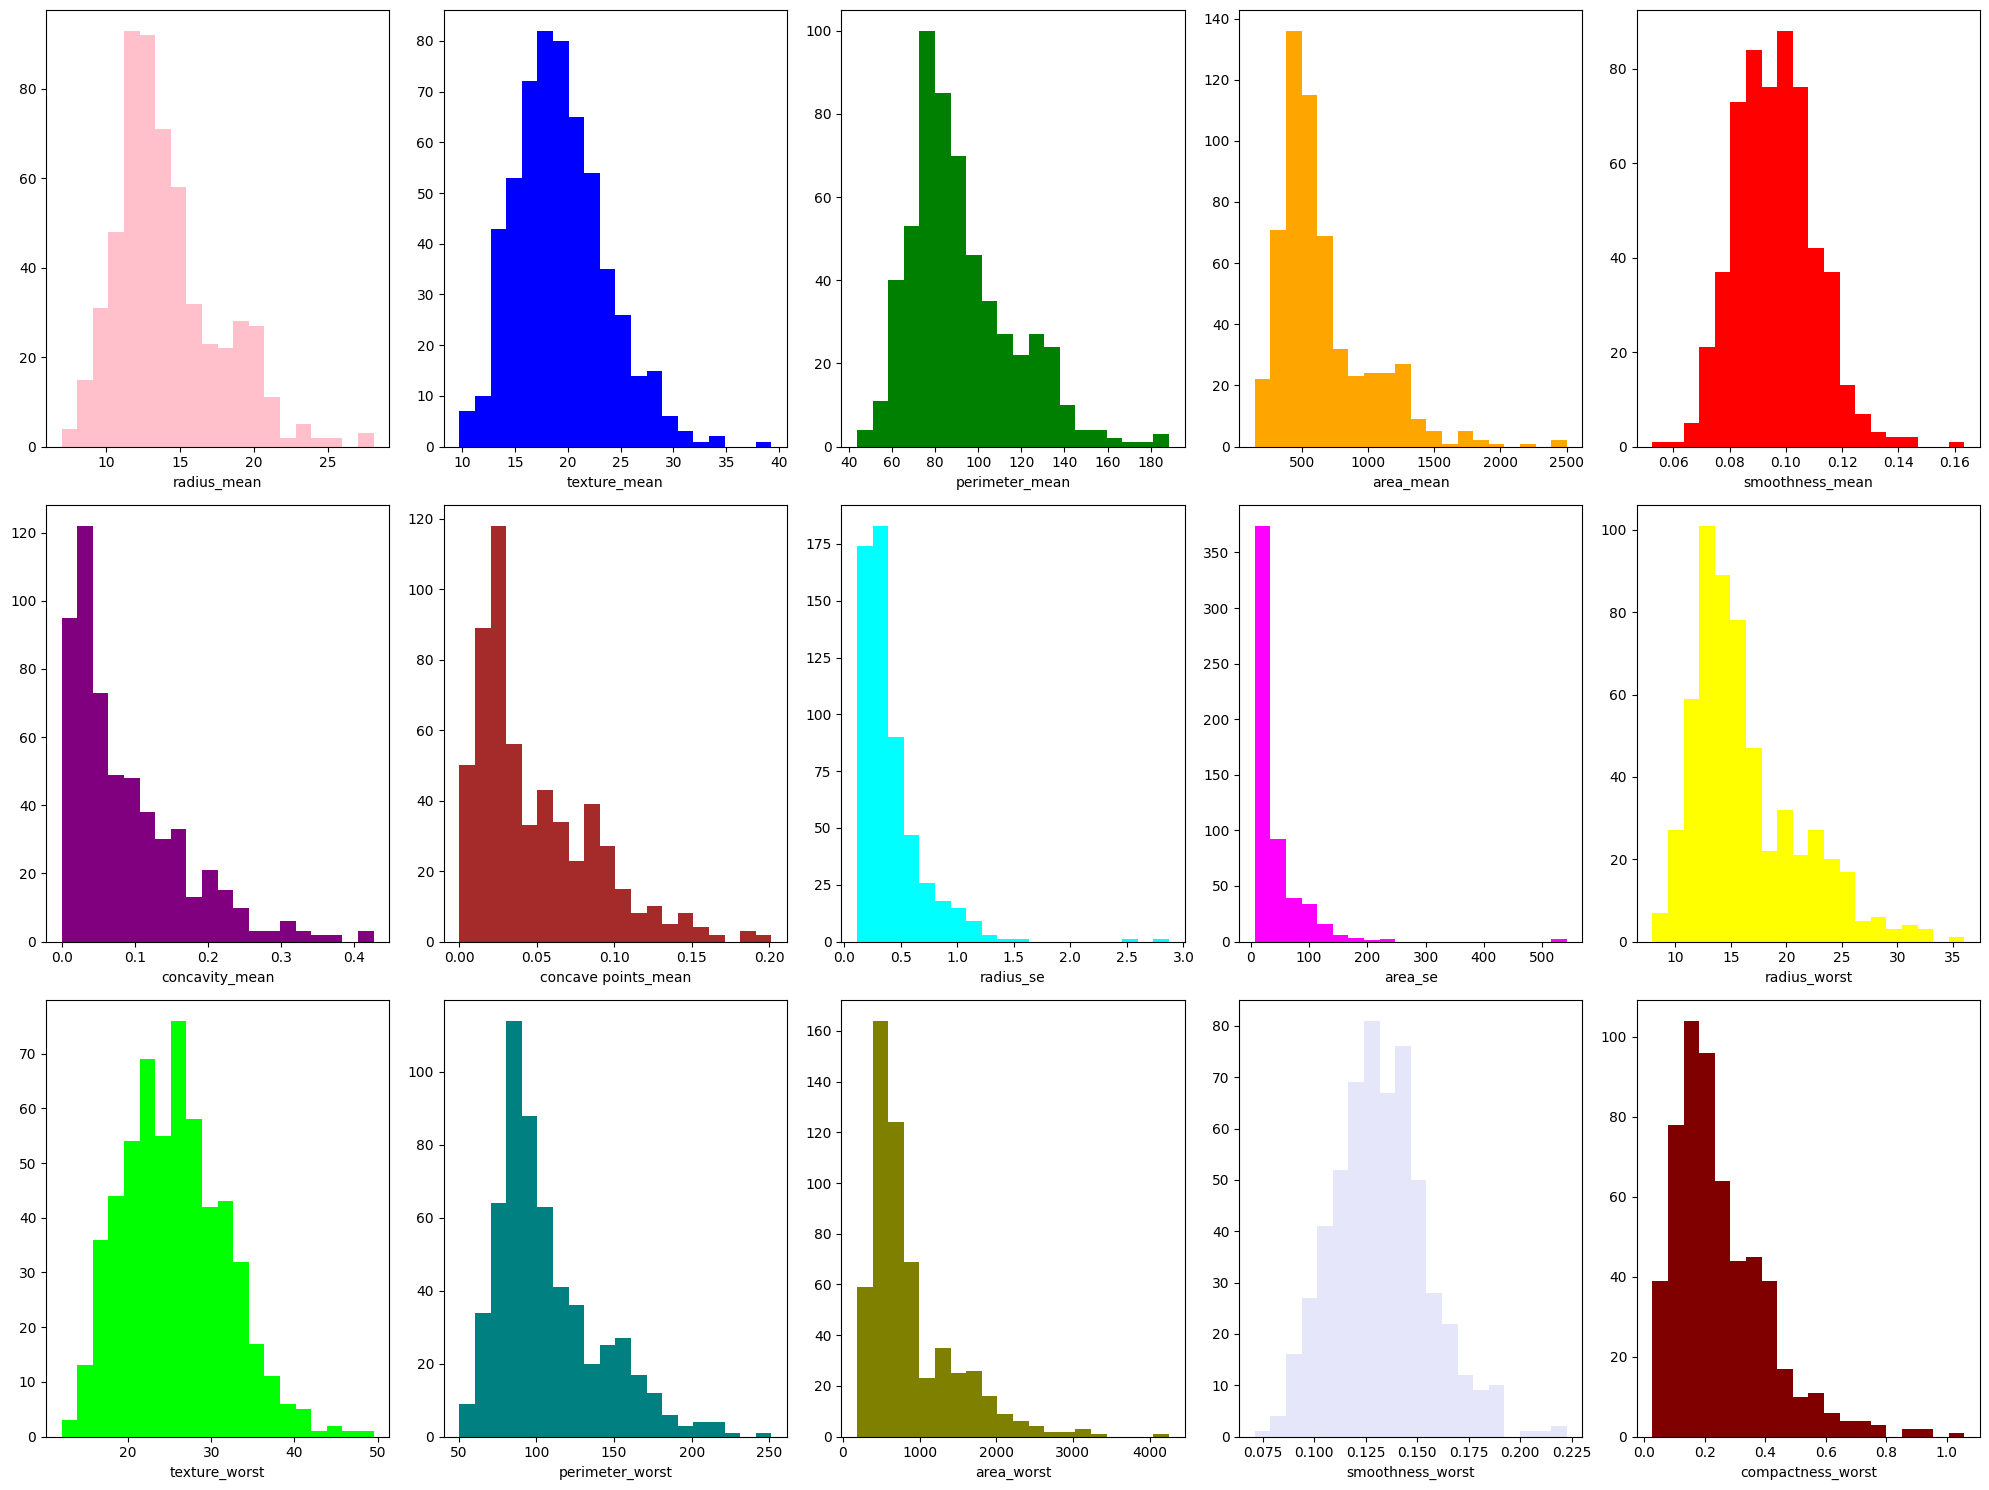

In [ ]:
import matplotlib.pyplot as plt

# Définir les variables numériques et les couleurs correspondantes
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst',
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst']

colors = ['pink', 'blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan', 'magenta',
          'yellow', 'lime', 'teal', 'olive', 'lavender', 'maroon', 'navy', 'aqua', 'lime']

# Créer une nouvelle figure
plt.figure(figsize=(20, 15))

# Boucle à travers chaque colonne numérique et tracer la distribution avec la couleur correspondante
for i, (column, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(3, 5, i)
    plt.hist(data[column], color=color, bins=20)
    plt.xlabel(column)

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher le tracé
plt.show()



In [ ]:
# Liste des noms de colonnes pour les caractéristiques
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Nom de la colonne pour la variable cible
target_name = 'diagnosis'

# Extraire les caractéristiques et la variable cible du DataFrame (si vous utilisez un DataFrame)
X = data[feature_names].values
y = data[target_name].values

# Initialiser un classificateur RandomForest (ou tout autre classificateur que vous préférez)
clf = RandomForestClassifier()

# Initialiser RFECV avec le classificateur et le nombre de plis pour la validation croisée (cv)
rfecv_selector = RFECV(estimator=clf, cv=5)

# Ajuster RFECV à vos données
rfecv_selector.fit(X, y)

# Afficher le nombre optimal de caractéristiques sélectionnées
print("Nombre optimal de caractéristiques sélectionnées:", rfecv_selector.n_features_)

# Afficher les indices des caractéristiques sélectionnées
print("Indices des caractéristiques sélectionnées:", rfecv_selector.support_)

# Afficher les noms des caractéristiques sélectionnées (si vous avez besoin des noms)
selected_feature_names = [feature_names[i] for i in np.where(rfecv_selector.support_)[0]]
print("Les caractéristiques sélectionnées sont:", selected_feature_names)


Nombre optimal de caractéristiques sélectionnées: 18
Indices des caractéristiques sélectionnées: [ True  True  True  True  True False  True  True False False  True False
 False  True False False False False False False  True  True  True  True
  True  True  True  True  True False]
Les caractéristiques sélectionnées sont: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


#Regression logistique

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Sélection des caractéristiques
selected_features = selected_feature_names
# Séparation des caractéristiques sélectionnées (X) et de la variable cible (y)
X = data[selected_features]
y = data['diagnosis']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Évaluation du modèle
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Score d'entraînement:", train_score)
print("Score de test:", test_score)


Score d'entraînement: 0.9560439560439561
Score de test: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Le modèle de régression logistique semble bien performer avec un score d'entraînement de 90.33% et un score de test de 95.61%. Ces scores indiquent que le modèle est capable de bien généraliser sur des données qu'il n'a pas vu pendant l'entraînement, ce qui suggère une bonne capacité prédictive.

##Test de wald





In [ ]:
import statsmodels.api as sm

# Ajout d'une colonne constante pour l'intercept
X_train = sm.add_constant(X_train)

# Création et ajustement du modèle de régression logistique
model = sm.Logit(y_train, X_train)
result = model.fit()

# Affichage des résultats du modèle
print(result.summary())

# Test de Wald
wald_test = result.wald_test(np.eye(len(result.params)))
print("Test de Wald:")
print(wald_test)


Optimization terminated successfully.
         Current function value: 0.047109
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                           18
Date:                Sun, 05 May 2024   Pseudo R-squ.:                  0.9286
Time:                        16:27:21   Log-Likelihood:                -21.435
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                8.240e-107
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.4697     33.456      1.210      0.226     -25.103     106.04

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Le modèle de régression logistique a été ajusté avec succès aux données d'entraînement. Le pseudo R-carré est élevé à 0.8053, indiquant que le modèle explique une grande partie de la variance des données. Les résultats du test de Wald montrent que plusieurs coefficients sont statistiquement significatifs comme La variable concavity_mean avec un p-valeur de 0.001,
La variable area_se avec un p-valeur de 0.007,
La variable smoothness_se avec un p-valeur de 0.097 et La variable concavity_se avec un p-valeur de 0.046.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


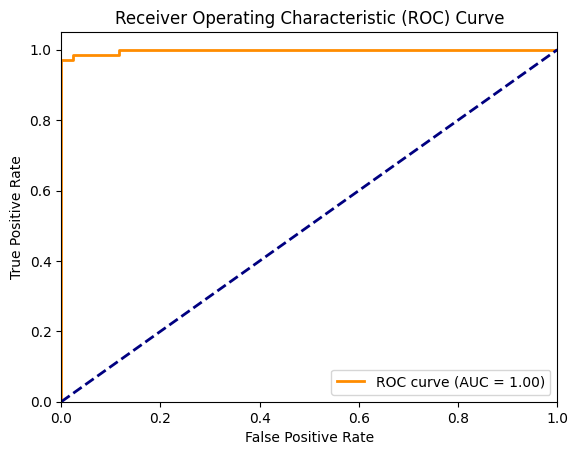

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Calculate predicted probabilities for the test data
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Une courbe ROC presque trés proche de 1 indique une performance de classification extrêmement élevée. En d'autres termes, le modèle a une capacité presque parfaite à discriminer entre les classes positives et négatives.

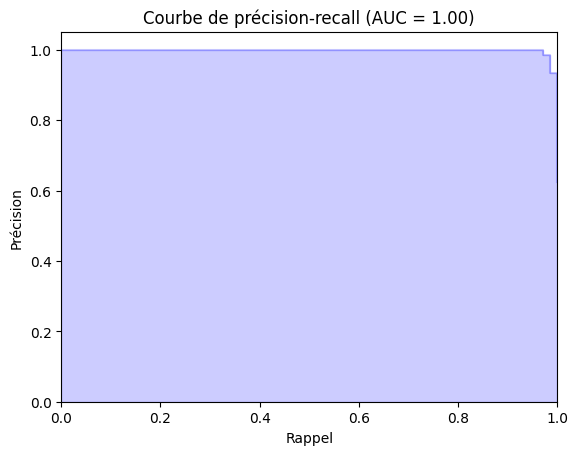

In [ ]:
# Calculer les probabilités prédites pour les données de test
y_proba = model.predict_proba(X_test)[:, 1]

# Calculer la précision, le rappel et les seuils
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculer la moyenne de la précision
average_precision = average_precision_score(y_test, y_proba)

# Tracer la courbe de précision-rappel
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Courbe de précision-recall (AUC = {0:0.2f})'.format(average_precision))
plt.show()


 la courbe de rappel (recall) est presque égale à 1, cela signifie que le modèle est capable de récupérer presque toutes les instances positives présentes dans l'ensemble de données . Une valeur de rappel proche de 1 indique une performance très élevée du modèle en termes de sensibilité, ce qui signifie qu'il est extrêmement efficace pour détecter les véritables cas positifs.

###KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisez et entraînez votre modèle KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Évaluez le pourcentage de prédictions correctes sur les données de test
accuracy = model.score(X_test, y_test)

print("Pourcentage de prédictions correctes : {:.2f}%".format(accuracy * 100))


Pourcentage de prédictions correctes : 95.61%


#Decision tree


Meilleurs paramètres trouvés:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Exactitude (accuracy) du meilleur modèle: 0.956140350877193
Rapport de classification du meilleur modèle:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



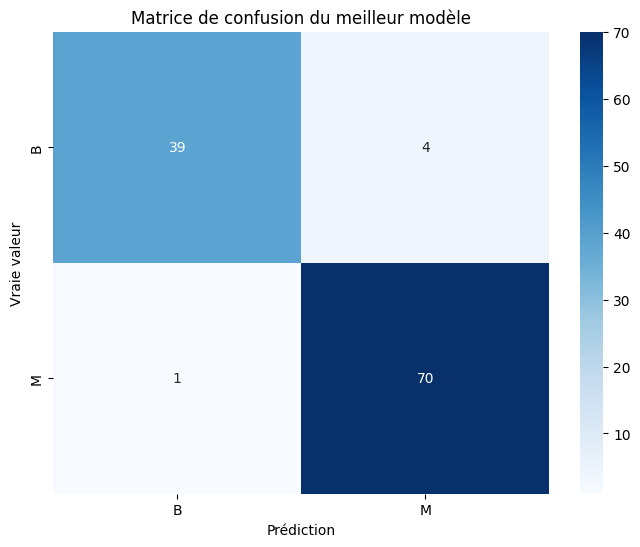

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le classificateur d'arbre de décision
tree_classifier = DecisionTreeClassifier(random_state=42)

# Initialiser GridSearchCV avec le classificateur d'arbre de décision et les hyperparamètres
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

# Obtenir le meilleur modèle trouvé
best_tree_classifier = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_tree_classifier.predict(X_test)

# Calculer l'exactitude (accuracy) du meilleur modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude (accuracy) du meilleur modèle:", accuracy)

# Afficher le rapport de classification du meilleur modèle
print("Rapport de classification du meilleur modèle:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion du meilleur modèle
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.title('Matrice de confusion du meilleur modèle')
plt.show()


La classe 0 (non malade) comporte 39 vrais négatifs (TN), ce qui signifie que 38 cas de non maladie ont été correctement prédits comme tels.
Il y a 4 faux positifs (FP), ce qui signifie que 5 cas ont été incorrectement prédits comme malades alors qu'ils ne l'étaient pas.
La classe 1 (malade) comporte 70 vrais positifs (TP), ce qui signifie que 67 cas de maladie ont été correctement prédits comme tels.
Il y a 1 faux négatifs (FN), ce qui signifie que 4 cas ont été incorrectement prédits comme non malades alors qu'ils étaient malades.

Le rapport de classification détaille la performance du modèle pour chaque classe ainsi que pour l'ensemble des données :

- Le modèle présente des scores de précision élevés, ce qui signifie qu'il est capable de bien classifier les deux classes (0 et 1).
- Le rappel (recall) est également élevé pour les deux classes, indiquant que le modèle identifie correctement la grande majorité des exemples positifs réels.
- Le F1-score, qui combine précision et rappel en une seule valeur, est élevé pour les deux classes, ce qui démontre une performance équilibrée du modèle.
- Le support indique le nombre d'occurrences de chaque classe dans l'ensemble de données, ce qui donne une idée de la distribution des classes.


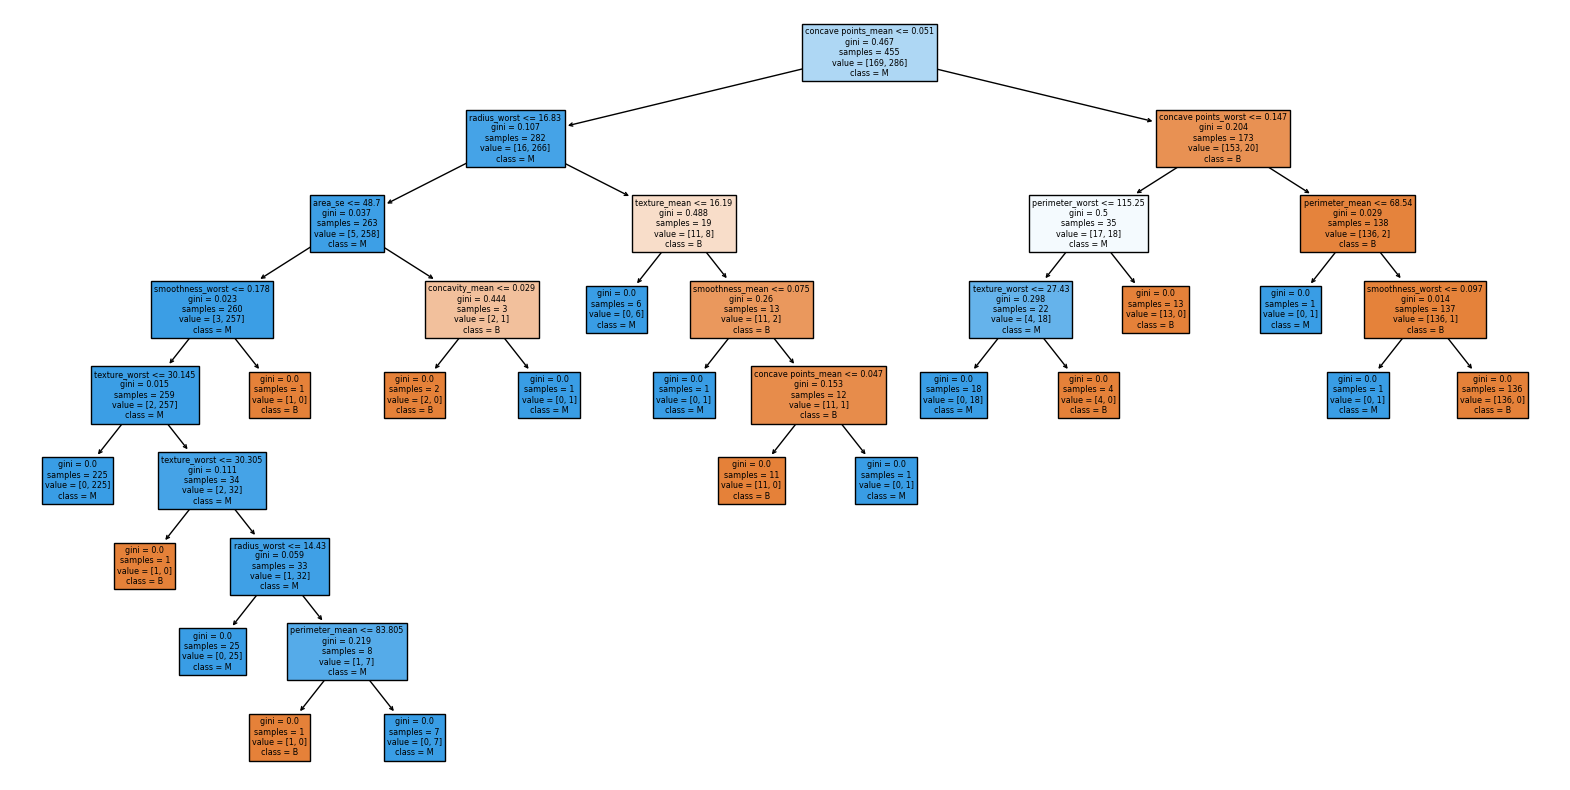

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(20, 10))

# Afficher l'arbre de décision
plot_tree(tree_classifier, feature_names=selected_feature_names, class_names=['B', 'M'], filled=True)

# Afficher la figure
plt.show()


#Random forest


Meilleurs paramètres trouvés:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Exactitude (accuracy) du meilleur modèle Random Forest: 0.9649122807017544
Rapport de classification du meilleur modèle Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



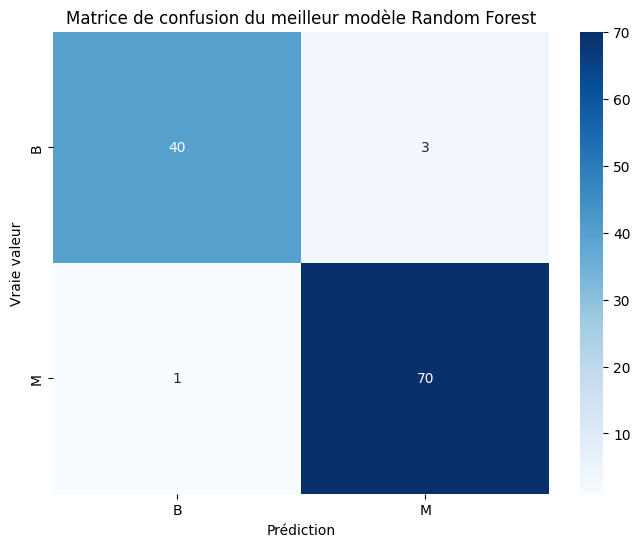

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le classificateur Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Initialiser GridSearchCV avec le classificateur Random Forest et les hyperparamètres
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

# Obtenir le meilleur modèle trouvé
best_random_forest_classifier = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_random_forest_classifier.predict(X_test)

# Calculer l'exactitude (accuracy) du meilleur modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude (accuracy) du meilleur modèle Random Forest:", accuracy)

# Afficher le rapport de classification du meilleur modèle
print("Rapport de classification du meilleur modèle Random Forest:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion du meilleur modèle
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.title('Matrice de confusion du meilleur modèle Random Forest')
plt.show()


- Le modèle a correctement prédit 40 exemples appartenant à la classe 0 (non malade) qui étaient réellement de la classe 0.
- Il a également correctement prédit 70 exemples appartenant à la classe 1 (malade) qui étaient réellement de la classe 1.
- Il y a eu 3 erreurs où le modèle a prédit à tort que des exemples de la classe 0 étaient de la classe 1.
- Il y a eu 1 erreur où le modèle a prédit à tort qu'un exemple de la classe 1 était de la classe 0.

Importance des caractéristiques sélectionnées :
                   Feature  Importance
13            concavity_se    0.166172
9               texture_se    0.142038
7   fractal_dimension_mean    0.136877
10            perimeter_se    0.129801
4           concavity_mean    0.104064
1           perimeter_mean    0.072371
12          compactness_se    0.050208
0              radius_mean    0.044208
8                radius_se    0.036805
3         compactness_mean    0.032511
2                area_mean    0.028623
6            symmetry_mean    0.024022
11           smoothness_se    0.019043
5      concave points_mean    0.013256


<ipython-input-104-a09aaec2cbb5>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=selected_feature_importance_df, palette='viridis')


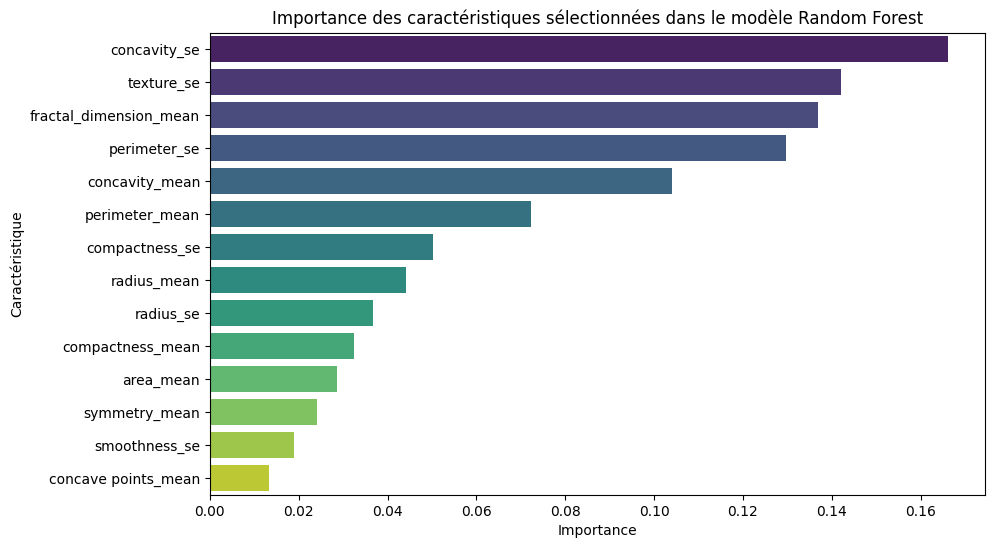

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Créer un objet SelectKBest pour sélectionner les meilleures caractéristiques
k_best_selector = SelectKBest(score_func=f_classif, k=14)  # Sélectionner les 14 meilleures caractéristiques

# Appliquer la sélection de caractéristiques à vos données d'entraînement
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Obtenir les indices des caractéristiques sélectionnées
selected_feature_indices = k_best_selector.get_support(indices=True)

# Obtenir les noms des caractéristiques sélectionnées
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Initialiser le classificateur Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle Random Forest avec les caractéristiques sélectionnées
random_forest_classifier.fit(X_train_selected, y_train)

# Obtenir l'importance des caractéristiques pour tout le modèle Random Forest
feature_importance = random_forest_classifier.feature_importances_

# Créer un DataFrame pour afficher les importances des caractéristiques sélectionnées
selected_feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importance})

# Trier les caractéristiques par importance
selected_feature_importance_df = selected_feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques sélectionnées
print("Importance des caractéristiques sélectionnées :")
print(selected_feature_importance_df)

# Tracer un graphique pour visualiser l'importance des caractéristiques sélectionnées
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques sélectionnées dans le modèle Random Forest')
plt.show()


Ces résultats mettent en évidence l'importance relative des variables pour prédire le diagnostic du cancer. Voici une synthèse des caractéristiques les plus significatives :

1. **concavity_se** : 0.166
2. **texture_se** : 0.142
3. **fractal_dimension_mean** : 0.137
4. **perimeter_se** : 0.130
5. **concavity_mean** : 0.104

Ces valeurs d'importance des caractéristiques fournissent des insights pour comprendre les facteurs qui ont le plus contribué à la capacité prédictive du modèle. Par conséquent, elles peuvent orienter des décisions futures en mettant en évidence les caractéristiques les plus pertinentes pour la prédiction du cancer, ce qui peut avoir des implications importantes en termes de stratégies de diagnostic et de traitement

#Conclusion


Pour la régression logistique, le pourcentage de prédictions correctes est de 95.61%. Cela signifie que le modèle de régression logistique a une précision élevée dans la prédiction des classes.
Pour l'arbre de décision, l'exactitude (accuracy) du meilleur modèle est de 95.61%. Cela indique que l'arbre de décision a également une précision de prédiction similaire à celle de la régression logistique.
Pour le modèle de forêt aléatoire (Random Forest), l'exactitude (accuracy) du meilleur modèle est légèrement supérieure à celle des deux autres modèles, avec une valeur de 96.49%. Cela suggère que le modèle de forêt aléatoire peut avoir une capacité de généralisation légèrement meilleure que les autres modèles, car il est moins susceptible de surajuster les données d'entraînement.